In [2]:
import numpy as np
from logger import H5Interface
from policy_learning.dmps import DynamicMovementPrimitive
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

ImportError: No module named logger

In [10]:
def gaussian_kernel(data, gamma=1.0):
    return np.exp(-gamma * data)


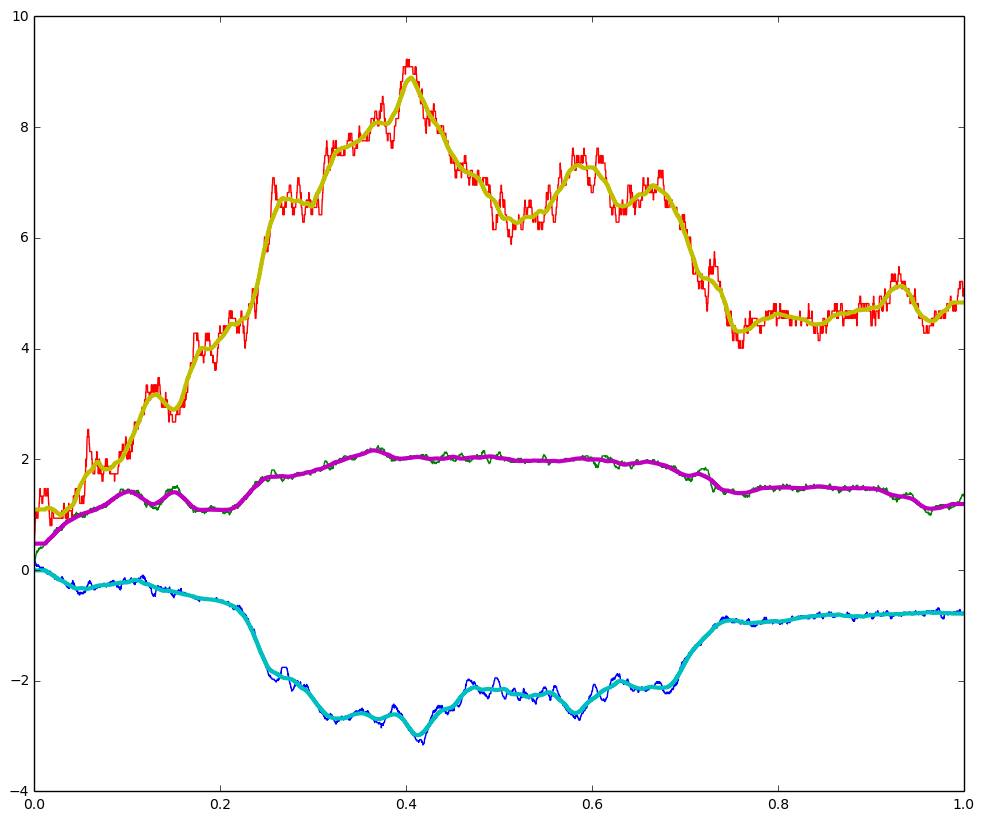

In [14]:
num_neighbors=100

h = H5Interface(h5_filename='command_trajectories.h5')
data = h.get_data('trajectory_28', 'raw_data')['w_raw'][:3,:]
data = data[:,4406:]

knr = KNeighborsRegressor(n_neighbors=num_neighbors, weights=gaussian_kernel)
t = np.linspace(0, 1, data.shape[1])[:, None]

mags = np.linalg.norm(data, axis=0)
xs = data[0,:]
ys = data[1,:]
zs = data[2,:]
knr.fit(t, xs)
xs_pred = knr.predict(t)
knr.fit(t, ys)
ys_pred = knr.predict(t)
knr.fit(t, zs)
zs_pred = knr.predict(t)
pred_data = np.vstack((xs_pred, ys_pred, zs_pred))
# normalize
pred_mags = np.linalg.norm(pred_data, axis=0)
            
fig = plt.figure(figsize=(12,10))
plt.plot(t, xs)
plt.plot(t, ys)
plt.plot(t, zs)
plt.plot(t, xs_pred, lw=3.0)
plt.plot(t, ys_pred, lw=3.0)
plt.plot(t, zs_pred, lw=3.0)

In [6]:
def gaussian_kernel(data):
    return np.exp(-1.0 * data)

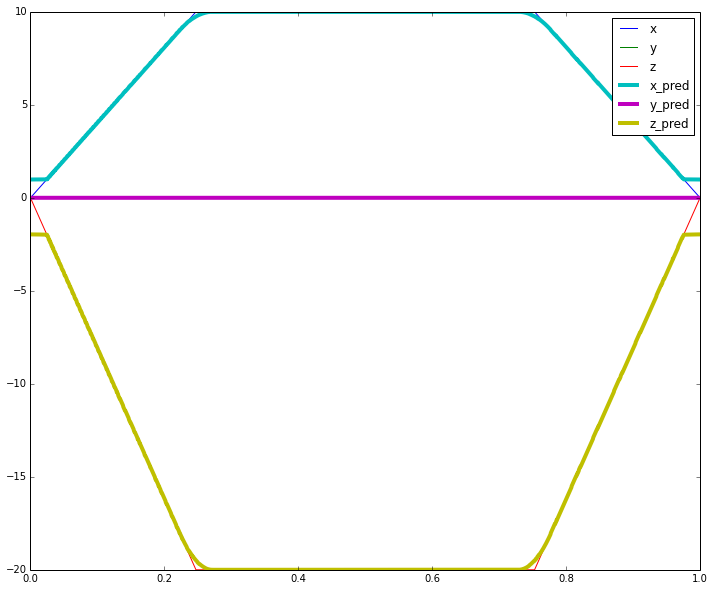

In [8]:
knr = KNeighborsRegressor(n_neighbors=100, weights=gaussian_kernel)
knr.fit(t[:, None], xs)
x_pred = knr.predict(t[:, None])
knr.fit(t[:, None], ys)
y_pred = knr.predict(t[:, None])
knr.fit(t[:, None], zs)
z_pred = knr.predict(t[:, None])
plt.figure(figsize=(12, 10))
plt.plot(t, xs, label='x')
plt.plot(t, ys, label='y')
plt.plot(t, zs, label='z')
plt.plot(t, x_pred, label='x_pred', lw=4.0)
plt.plot(t, y_pred, label='y_pred', lw=4.0)
plt.plot(t, z_pred, label='z_pred', lw=4.0)
plt.legend()
plt.show()

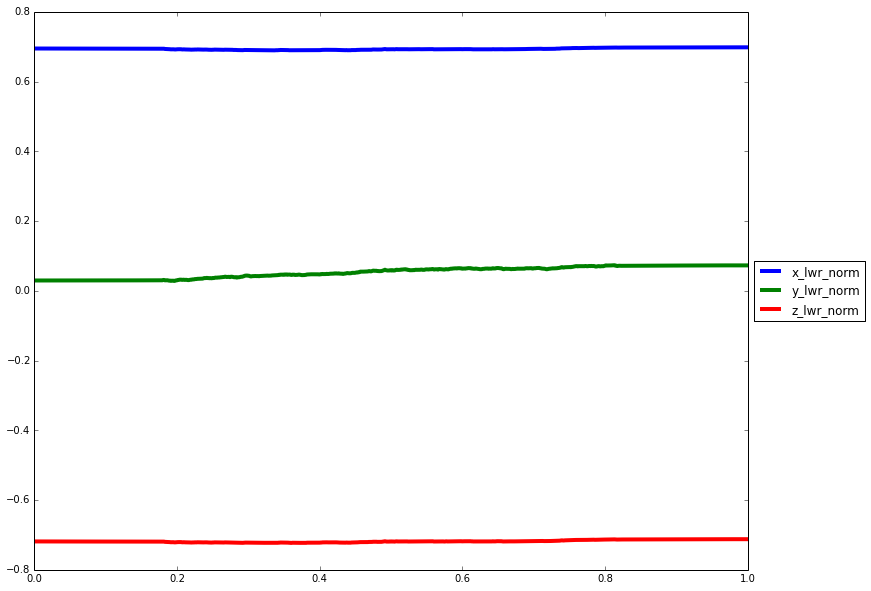

In [7]:
pred_data = np.vstack((x_pred, y_pred, z_pred))
pred_mags = np.linalg.norm(pred_data, axis=0)
x_pred_norm = x_pred / pred_mags
y_pred_norm = y_pred / pred_mags
z_pred_norm = z_pred / pred_mags
#x_norm_sphere = np.sin(theta_pred) * np.cos(phi_pred)
#y_norm_sphere = np.sin(theta_pred) * np.sin(phi_pred)
#z_norm_sphere = np.cos(theta_pred)

num_bfs=20

dmp = DynamicMovementPrimitive(xs, num_bfs=num_bfs)
xs_dmp = dmp.get_rollout()[0]
dmp = DynamicMovementPrimitive(ys, num_bfs=num_bfs)
ys_dmp = dmp.get_rollout()[0]
dmp = DynamicMovementPrimitive(zs, num_bfs=num_bfs)
zs_dmp = dmp.get_rollout()[0]
dmp_data = np.vstack((xs_dmp, ys_dmp, zs_dmp))
dmp_mags = np.linalg.norm(dmp_data, axis=0)
xs_dmp_norm = xs_dmp / dmp_mags
ys_dmp_norm = ys_dmp / dmp_mags
zs_dmp_norm = zs_dmp / dmp_mags

plt.figure(figsize=(16, 10))
ax = plt.subplot(111)
ax.plot(t, x_pred_norm, label='x_lwr_norm', lw=4.0)
ax.plot(t, y_pred_norm, label='y_lwr_norm', lw=4.0)
ax.plot(t, z_pred_norm, label='z_lwr_norm', lw=4.0)
#ax.plot(t, xs_dmp_norm, label='x_dmp_norm', lw=4.0, ls='dashdot')
#ax.plot(t, ys_dmp_norm, label='y_dmp_norm', lw=4.0, ls='dashdot')
#ax.plot(t, zs_dmp_norm, label='z_dmp_norm', lw=4.0, ls='dashdot')


#ax.plot(t, xs, label='x')
#ax.plot(t, ys, label='y')
#ax.plot(t, zs, label='z')
#ax.plot(t, xs_dmp, label='x_dmp', lw=4.0, ls='dashdot')
#ax.plot(t, ys_dmp, label='y_dmp', lw=4.0, ls='dashdot')
#ax.plot(t, zs_dmp, label='z_dmp', lw=4.0, ls='dashdot')

#ax.plot(t, xs)
#ax.plot(t, xs_dmp)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# plt.figure(figsize=(12, 10))
# plt.plot(t, xs, label='x')
# plt.plot(t, ys, label='y')
# plt.plot(t, zs, label='z')
# plt.legend()
# plt.show()

# plt.figure(figsize=(12, 10))
# dmp_xs = dmp.cs.get_rollout(dmp.num_pts, dmp.duration * dmp.tau)
# bfs = dmp.bfs.get_rollout(dmp_xs)
# for b in dmp.ts.w[:, None] * bfs:
#     plt.plot(t, b)
# plt.figure(figsize=(12, 10))
# for b in bfs:
#     plt.plot(t, b)
# plt.show()